In [1]:
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

In [3]:
import tensorflow as tf

In [4]:
dataset=tf.keras.utils.get_file("aclImdb_v1",
                        url,
                        untar=True,
                        cache_dir=".",
                        cache_subdir=" ")

84125825/84125825 [==============================] - 2s 0us/step


In [5]:
import os
dataset_dir=os.path.join(os.path.dirname(dataset),"aclImdb")# veri setinin yolunu dataset_dir e atadik



In [6]:
os.listdir(dataset_dir)

['test', 'imdb.vocab', 'train', 'README', 'imdbEr.txt']

In [7]:
train_dir=os.path.join(dataset_dir, "train")
os.listdir(train_dir)

['unsupBow.feat',
 'neg',
 'unsup',
 'urls_pos.txt',
 'pos',
 'labeledBow.feat',
 'urls_unsup.txt',
 'urls_neg.txt']

In [8]:
sample_file=os.path.join(train_dir,"pos/1181_9.txt")
with open(sample_file) as f:
 print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [9]:
# gereksiz dosya kaldirma
remove_dir=os.path.join(train_dir,"unsup")
import shutil
shutil.rmtree(remove_dir)

# Loading th dataset

In [10]:
batch_size=32 # verileri kacarli gruplara ayiracagimz
seed=42 # random
# training set
raw_train_ds=tf.keras.preprocessing.text_dataset_from_directory(

    train_dir,
    batch_size=batch_size,
    validation_split=0.2,# train in %20 si validasyon verisi olacak
    subset="training",
    seed=seed

)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [11]:
# random review und label zeigen

import numpy as np
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [12]:
#validation verisi
raw_val_ds=tf.keras.preprocessing.text_dataset_from_directory(

    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=seed

)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [13]:
#test verisi
test_dir=os.path.join(dataset_dir,"test")
raw_test_ds=tf.keras.preprocessing.text_dataset_from_directory(

    test_dir,
    batch_size=batch_size,


)

Found 25000 files belonging to 2 classes.


#Data Preprocessing

In [14]:
import re
import string
# veri temizlemek icin
def custom_standrdization(input_data):
  lowercase=tf.strings.lower(input_data)
  stripped_html=tf.strings.regex_replace(lowercase,'<br />', ' ') #html tag leri kaldirmak icin
  return tf.strings.regex_replace(stripped_html,'[%s]'% re.escape(string.punctuation), '')

In [15]:
# text vektorization katmani
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_features=10000
sequence_length=250
vectorize_layer=TextVectorization(
    standardize= custom_standrdization,
    max_tokens= max_features,
    output_mode="int",
    output_sequence_length=sequence_length
)



In [16]:
# metin iceren veri seti olustur
train_text=raw_train_ds.map(lambda x, y:x)
vectorize_layer.adapt(train_text)

In [17]:
def vectorize_text(text,label):
  text=tf.expand_dims(text,-1)
  return vectorize_layer(text),label

In [18]:
text_batch, label_batch=next(iter(raw_train_ds))


In [20]:
first_review,first_label=text_batch[0],label_batch[0]
print("Review",first_review)
print("Label",raw_train_ds.class_names[first_label])

print("Vectorized review", vectorize_text(first_review,first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [19]:
print("9-->",vectorize_layer.get_vocabulary()[9])
print("1312-->",vectorize_layer.get_vocabulary()[1312])
print("Vocabulary size: {}".format(len(vectorize_layer.get_vocabulary())))

9--> it
1312--> thus
Vocabulary size: 10000


In [21]:
train_ds=raw_train_ds.map(vectorize_text)
val_ds=raw_val_ds.map(vectorize_text)
test_ds=raw_test_ds.map(vectorize_text)

Configure the DAtaset for Performance

In [22]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)

#creating the Model

In [45]:
embedding_dim=16# Word embedding modelleri, büyük metin verilerini kullanarak bu tür vektörleri öğrenir.
#Word embedding, metin verilerini sayısal bir biçimde temsil etmek ve bu verileri daha etkili bir şekilde işlemek için güçlü bir araçtır ve birçok dil işleme uygulamasında kullanılır.
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features +1,embedding_dim),# tam sayi ile kodlanmis metinleri alir
    tf.keras.layers.Dropout(0.2),#  Bu katman, modelin aşırı uyumu önlemek için eğitim sırasında belirli bir oranda rastgele bağlantıları devre dışı bırakan bir düşürme (dropout) katmanıdır
    #Bu katman, kelime gömme vektörlerinin ortalamasını alarak bir metin belgesini temsil eden tek bir vektör elde eder. Bu, metin belgelerini sabit bir boyuta dönüştürmeye yardımcı olur.
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1) # binary activation output


])

In [46]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_15 (Dropout)        (None, None, 16)          0         
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160033 (625.13 KB)
Trainable params: 160033 (625.13 KB)
Non-trainable params: 0 (0.00 Byte)
______________

Compiling the model

In [47]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),# ikili siniflandirma oldugu icin
              optimizer="adam",
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

#training model

In [48]:
epochs=10
histroy = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
625/625 [==============================] - 9s 14ms/step - loss: 0.6657 - binary_accuracy: 0.6918 - val_loss: 0.6166 - val_binary_accuracy: 0.7692
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5494 - binary_accuracy: 0.7976 - val_loss: 0.4989 - val_binary_accuracy: 0.8222
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.4454 - binary_accuracy: 0.8450 - val_loss: 0.4204 - val_binary_accuracy: 0.8470
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3793 - binary_accuracy: 0.8655 - val_loss: 0.3739 - val_binary_accuracy: 0.8610
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.3365 - binary_accuracy: 0.8773 - val_loss: 0.3455 - val_binary_accuracy: 0.8656
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3055 - binary_accuracy: 0.8888 - val_loss: 0.3262 - val_binary_accuracy: 0.8720
Epoch 7/10
625/625 [==============================] - 8s 13ms

## Evaluating the model

In [49]:
loss,accuracy=model.evaluate(test_ds)
print("Loss: ",loss)
print("Accuracy:  ",accuracy)

782/782 [==============================] - 9s 11ms/step - loss: 0.3109 - binary_accuracy: 0.8733
Loss:  0.31088513135910034
Accuracy:   0.8733199834823608


## Plot of Accuracy and Losss

In [52]:
history_dict=histroy.history
history_dict.keys()



dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [58]:
import matplotlib.pyplot as plt
acc=history_dict["binary_accuracy"]
val_acc=history_dict["val_binary_accuracy"]
loss=history_dict["loss"]
val_loss=history_dict["val_loss"]


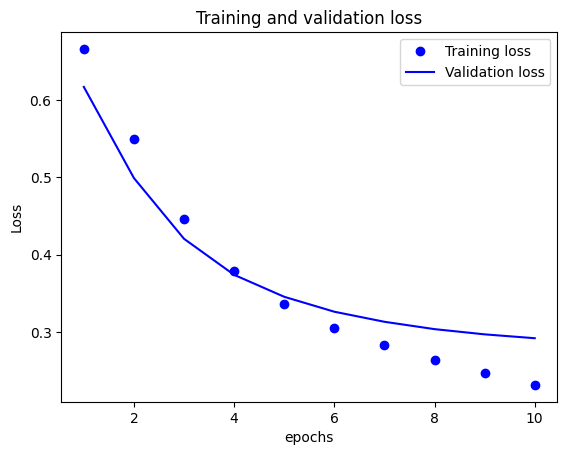

In [59]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

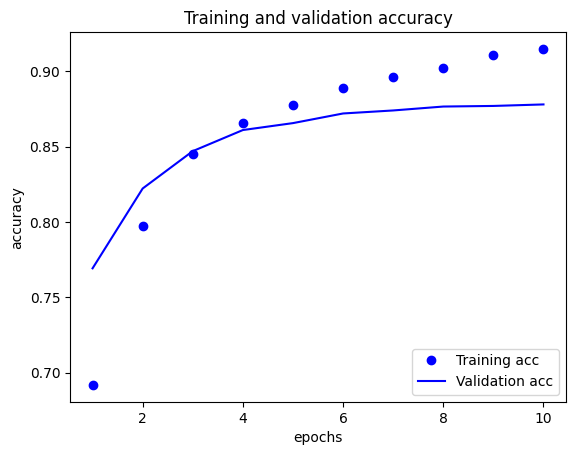

In [60]:
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.show()

##Exporting the Model


In [61]:
# text vektorizytion i dahil et
export_model=tf.keras.Sequential([
    vectorize_layer,
    model,
    tf.keras.layers.Activation("sigmoid")
])

In [62]:
export_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                     optimizer="adam",
                     metrics=["accuracy"])

In [63]:
loss,accuracy=export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 7s 8ms/step - loss: 0.3109 - accuracy: 0.8733
0.8733199834823608


##Predict new data

In [65]:
examples=[
    "The movie was perfect",
    "The movie was okay",
    "The movie was awful"
]

In [66]:
export_model.predict(examples)

1/1 [==============================] - 0s 225ms/step


array([[0.6192366 ],
       [0.43972945],
       [0.32459098]], dtype=float32)